In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [5]:
glob.glob(r'D:\Python Course with Notes\Time Series Data Analysis\individual_stocks_5yr/*csv')

['D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\Python Course with No

In [7]:
len(glob.glob(r'D:\Python Course with Notes\Time Series Data Analysis\individual_stocks_5yr/*csv'))

509

In [9]:
company_list =[
    r'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AMZN_data.csv',
    r'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\GOOG_data.csv',
    r'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\MSFT_data.csv',
]

    

In [15]:
import warnings 
from warnings import filterwarnings 
filterwarnings('ignore')

In [35]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data =pd.concat([current_df,all_data] , ignore_index=True)

In [37]:
all_data.shape

(4752, 7)

In [39]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [41]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [45]:
all_data.isnull().sum()


date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [59]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [57]:
all_data['date']=pd.to_datetime(all_data['date'])

In [61]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [65]:
tech_list =all_data['Name'].unique()

In [67]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

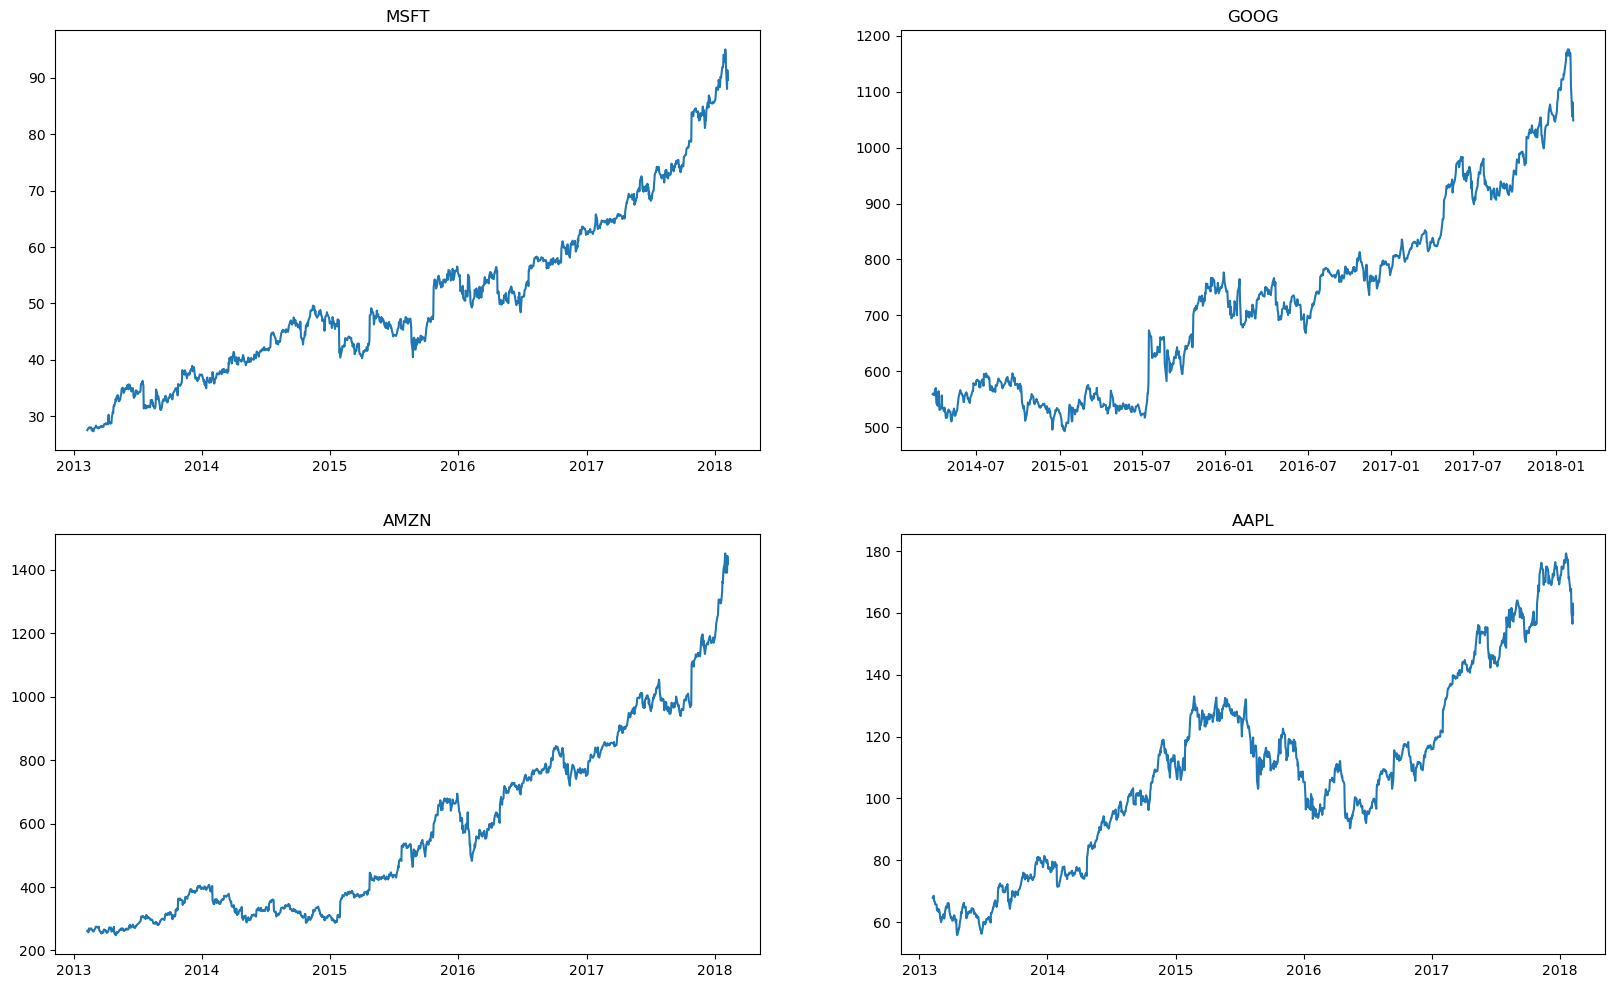

In [69]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list ,1):
    plt.subplot(2,2, index)
    filter1= all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [71]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [73]:
new_data =all_data.copy()

In [75]:
ma_day=[10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)]= new_data['close'].rolling(ma).mean()

In [79]:
new_data.tail(10)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4742,2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,176.475,174.5575,173.1050
4743,2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,176.098,174.6030,173.0558
4744,2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,175.185,174.4470,172.9882
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [81]:
new_data.set_index('date',inplace=True)

In [83]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


In [91]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

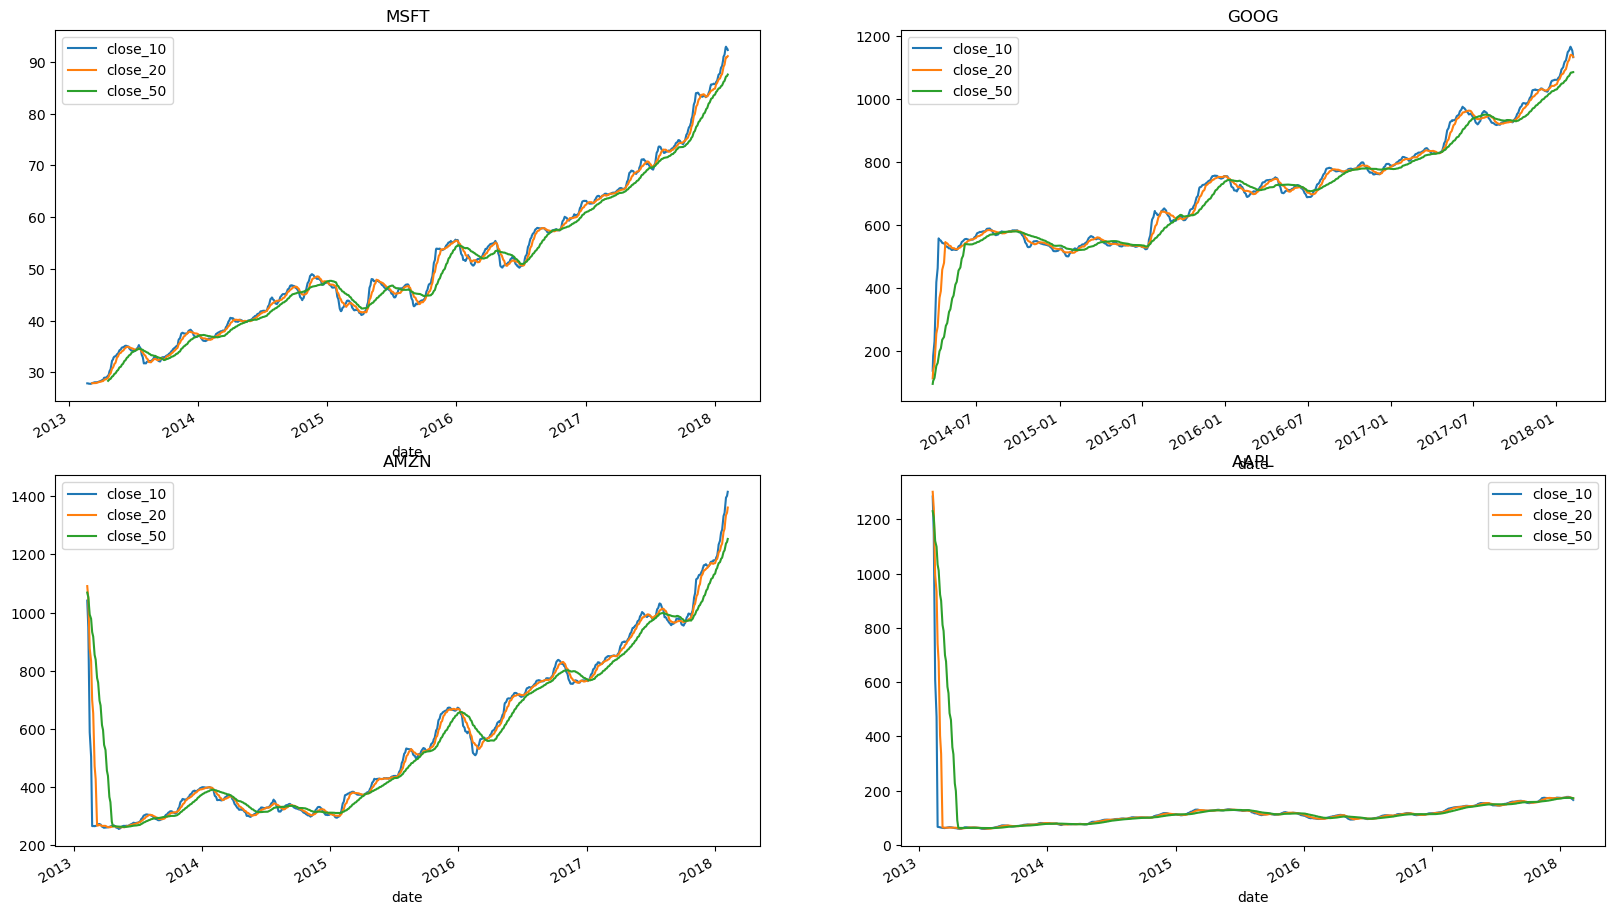

In [101]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list ,1):
    plt.subplot(2,2, index)
    filter1= new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

In [103]:
company_list

['D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [105]:
apple =pd.read_csv(    r'D:\\Python Course with Notes\\Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv')

In [107]:
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [109]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [113]:
apple['Daily return(in %)']=apple['close'].pct_change()*100

In [115]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [121]:
import plotly.express as px

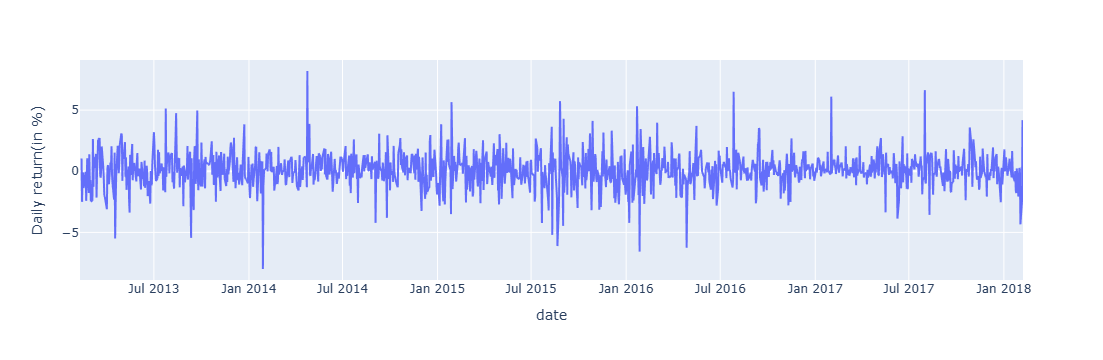

In [125]:
px.line(apple ,x='date', y='Daily return(in %)')

In [127]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [129]:
apple['date']=pd.to_datetime(apple['date'])

In [131]:
apple.dtypes


date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [133]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [ ]:
apple.set_index('date',inplace=True)

In [147]:
apple.head(5)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [151]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

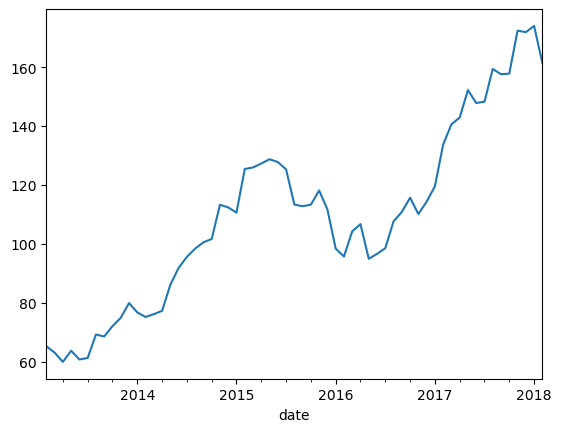

In [153]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

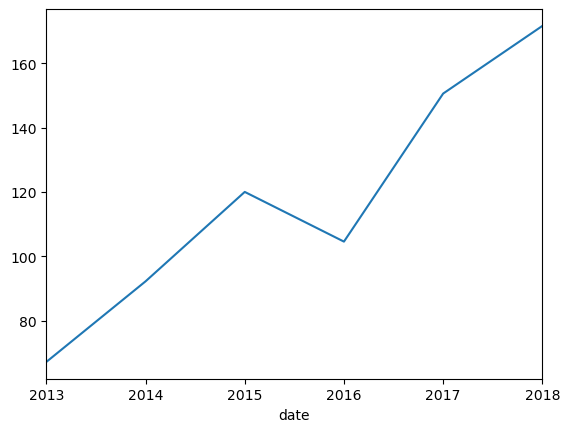

In [155]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

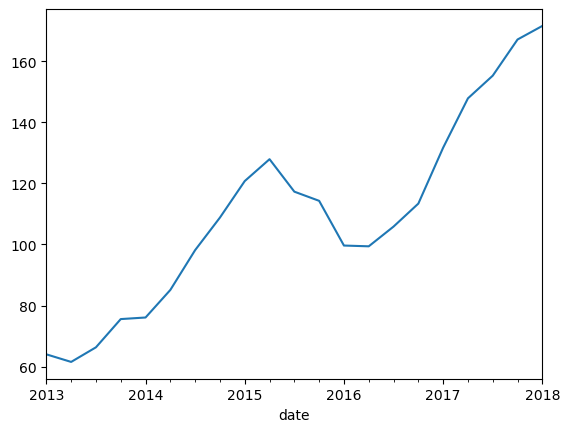

In [157]:
apple['close'].resample('Q').mean().plot()

In [159]:
company_list

['D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [161]:
company_list[0]

'D:\\\\Python Course with Notes\\\\Time Series Data Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [163]:
app=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
goog=pd.read_csv(company_list[2])
msft=pd.read_csv(company_list[3])

In [247]:
closing_price=pd.DataFrame()

In [249]:
closing_price['apple_close']=app['close']
closing_price['amzn_close']=amzn['close']
closing_price['goog_close']=goog['close']
closing_price['msft_close']=msft['close']

In [251]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


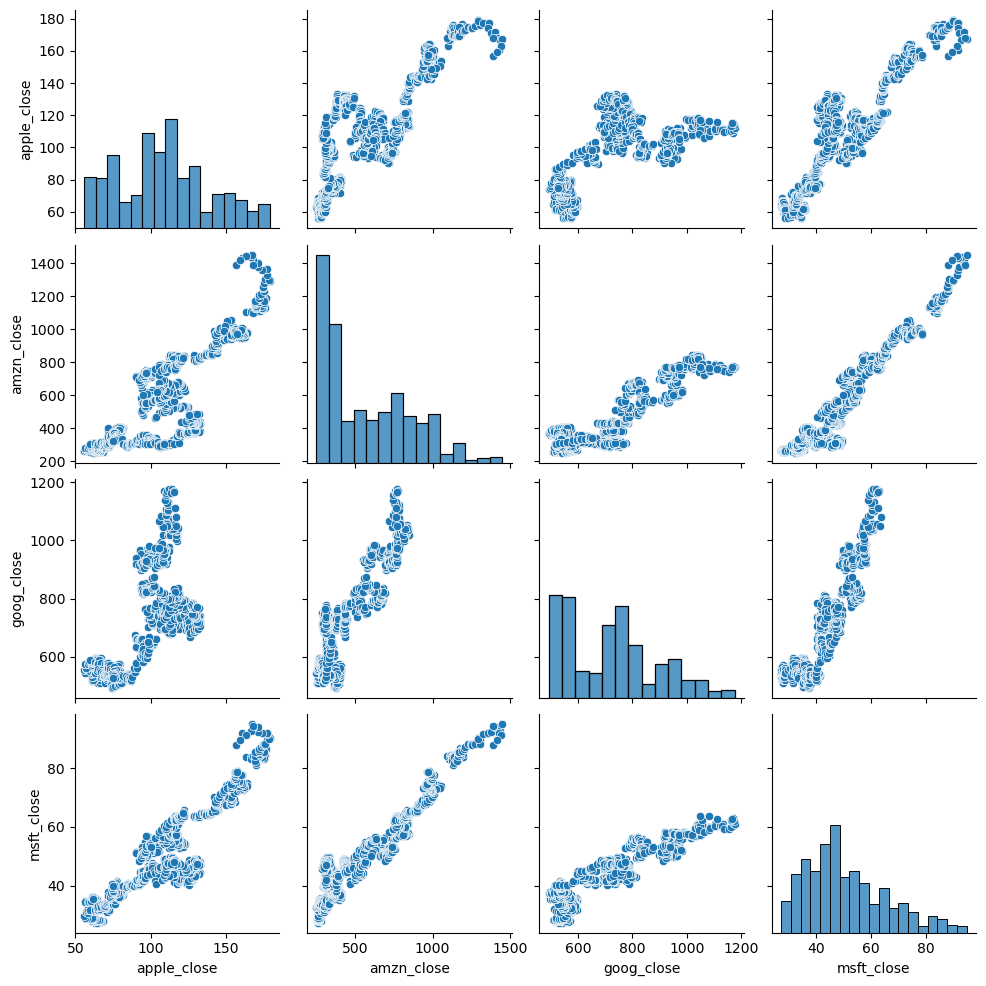

In [253]:
sns.pairplot(closing_price)

In [255]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

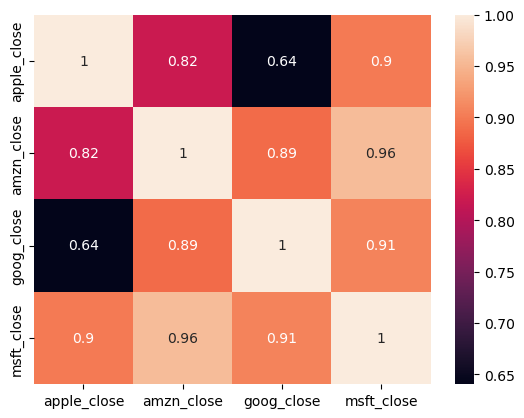

In [257]:
sns.heatmap(closing_price.corr(), annot=True)

In [259]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [261]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [263]:
(closing_price['apple_close']-closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [265]:
for col in closing_price.columns:
    closing_price[col+'_pct_change']=(closing_price[col]-closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [267]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [269]:
 closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [277]:
clsing_p=closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

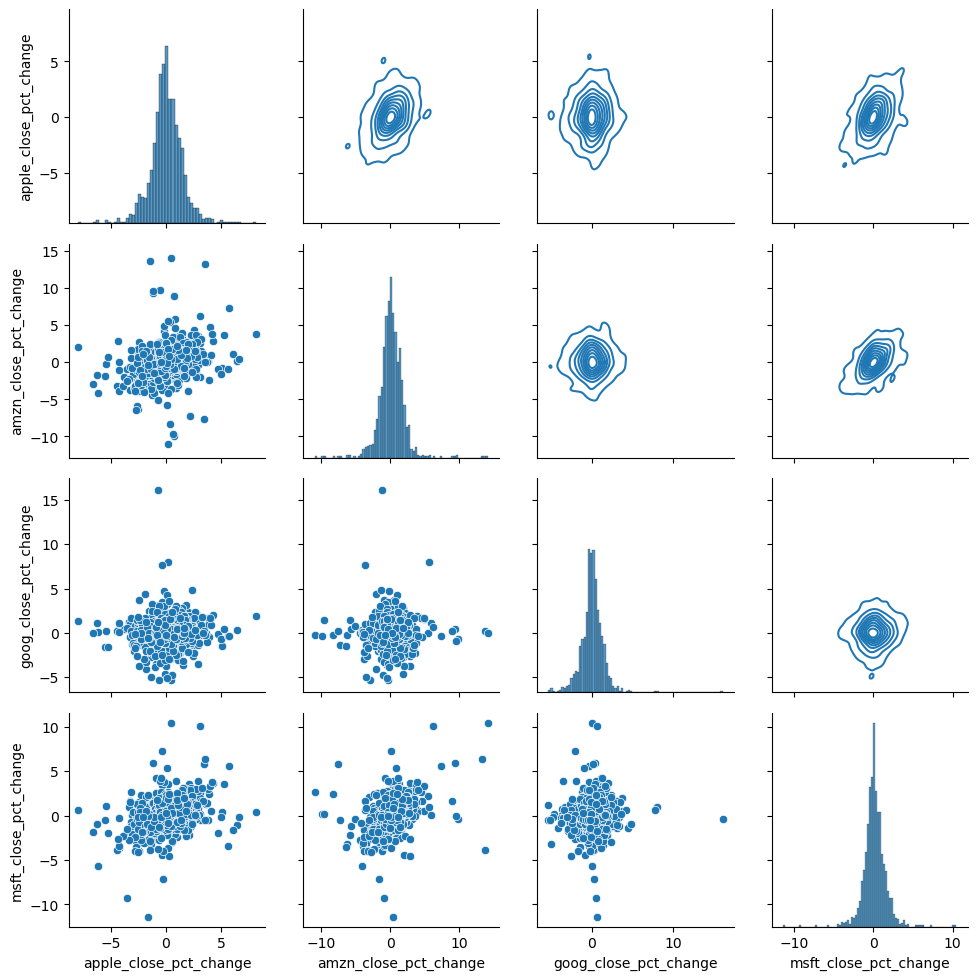

In [281]:
g=sns.PairGrid(data=clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [283]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000
